In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

In [10]:
# Assuming you have a DataFrame with historical price data where each column represents a stock
# The index should be dates

# Define the allocation weights for each stock
weights = np.random.rand(10)

weights /= weights.sum()

sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()[:10]
start_date = '2023-01-01'
end_date = '2023-06-01'

# Create an empty DataFrame to store the stock prices
sp500_prices = pd.DataFrame(columns=sp500_tickers)
for ticker in sp500_tickers:
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        sp500_prices[ticker] = stock_data['Adj Close']
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
# print(sp500_prices.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:

def backtest(test_df, weights):
    '''
    df of stocks with index being date, cols being stocks, each entry being the price 
    weights represent the normalized portfolio weights
    '''
    returns = test_df.pct_change().dropna()

    portfolio_returns = (returns * weights).sum(axis=1)

    cumulative_returns = (1 + portfolio_returns).cumprod()

    annualized_return = (cumulative_returns[-1])**(252/len(cumulative_returns.index)) - 1  # Assuming 252 trading days
    annualized_volatility = portfolio_returns.std() * np.sqrt(252)

    # Calculate Sharpe Ratio
    risk_free_rate = 0.03 # can change 
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

    # Calculate Maximum Drawdown
    cumulative_returns_index = (1 + portfolio_returns).cumprod()
    cumulative_max = cumulative_returns_index.cummax()
    drawdown = (cumulative_returns_index - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()

    print(f"Annualized Return: {annualized_return:.2%}")
    print(f"Annualized Volatility: {annualized_volatility:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Maximum Drawdown: {max_drawdown:.2%}")


    plt.plot(cumulative_returns)
    plt.title('Portfolio Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.show()


In [13]:
test_tickers = ['XOM', 'SHW', 'UPS', 'DUK', 'UNH', 'JPM', 'AMZN', 'AAPL', 'META', 'AMT']
test_df = pd.DataFrame(columns=test_tickers)
for ticker in test_df:
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        test_df[ticker] = stock_data['Adj Close']
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

test_allocation = [0.13505565, 0.035510365, 0.0075728535, 0.017450025,
0.0985434, 0.005851273, 0.010397789, 0.1427242,
0.33957437, 0.20732006]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Annualized Return: 100.39%
Annualized Volatility: 23.63%
Sharpe Ratio: 4.12
Maximum Drawdown: -7.53%


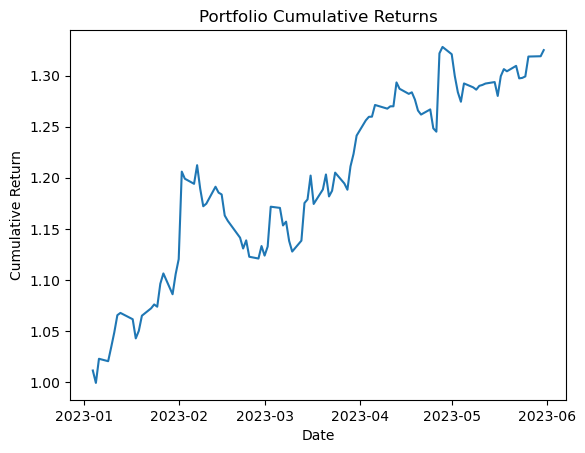

In [14]:
# backtest(sp500_prices, weights)
backtest(test_df,test_allocation)